# Data/Domain Understanding and Exploration

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load data
data = pd.read_csv("AutoTrader Dataset.csv")

In [2]:
data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [3]:
data.shape

(402005, 12)

In [4]:
# Check data types of columns
print(data.dtypes)

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object


In [5]:
# Analyze the distribution of selling price
print(data["price"].describe())

count    4.020050e+05
mean     1.734197e+04
std      4.643746e+04
min      1.200000e+02
25%      7.495000e+03
50%      1.260000e+04
75%      2.000000e+04
max      9.999999e+06
Name: price, dtype: float64


In [13]:
# Analyze the distribution of mileage
print(data["mileage"].describe())

count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64


In [14]:
# Analyze the distribution of year_of_registration
print(data["year_of_registration"].describe())

count    368694.000000
mean       2015.006206
std           7.962667
min         999.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64


In [15]:
# Identify missing values
print(data.isnull().sum())

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64


In [16]:
corr_matrix = data.corr()
print(corr_matrix["mileage"]["price"])

-0.1602037449776471


In [17]:
corr_matrix = data.corr()
print(corr_matrix["year_of_registration"]["price"])

0.10234109038334868


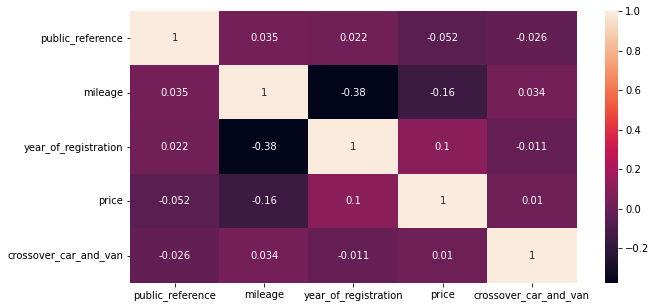

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)
plt.show()

# Data Processing for Machine Learning

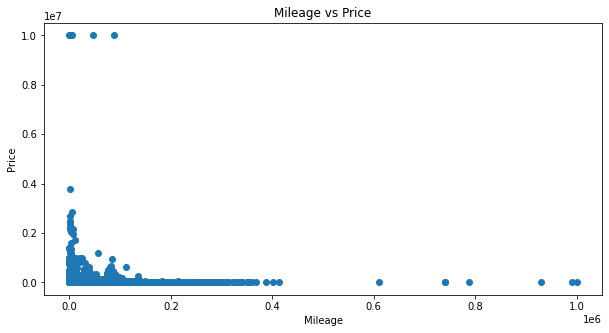

In [19]:
plt.scatter(data["mileage"], data["price"])
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage vs Price")
plt.show()

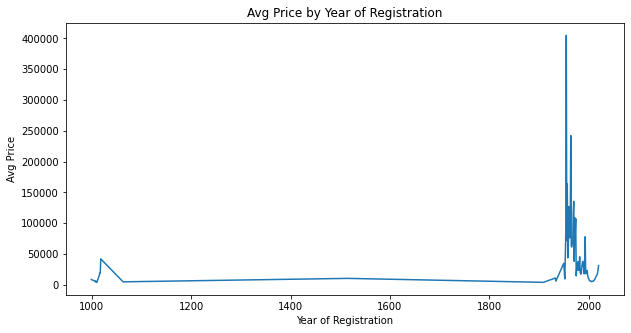

In [20]:

data.groupby("year_of_registration")["price"].mean().plot()
plt.xlabel("Year of Registration")
plt.ylabel("Avg Price")
plt.title("Avg Price by Year of Registration")
plt.show()

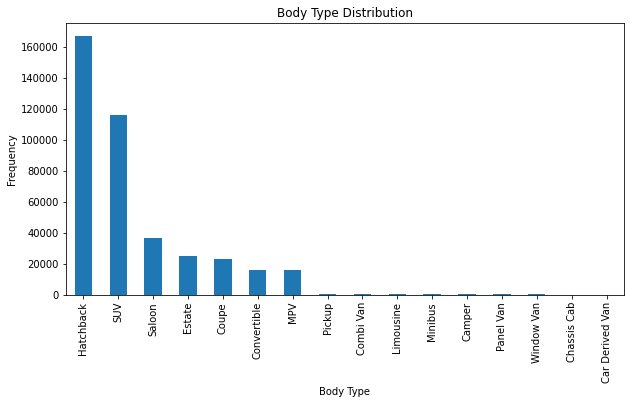

In [21]:
data["body_type"].value_counts().plot(kind="bar")
plt.xlabel("Body Type")
plt.ylabel("Frequency")
plt.title("Body Type Distribution")
plt.show()

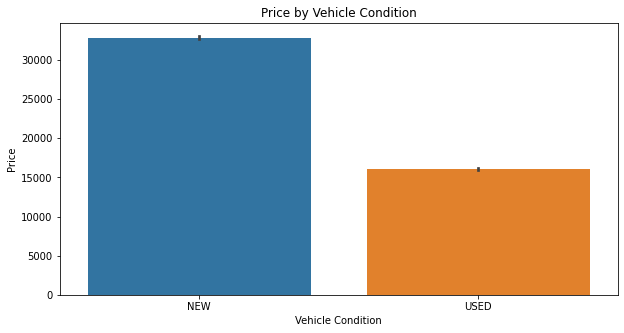

In [22]:
import seaborn as sns
sns.barplot(x="vehicle_condition", y="price", data=data)
plt.xlabel("Vehicle Condition")
plt.ylabel("Price")
plt.title("Price by Vehicle Condition")
plt.show()


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# create an imputer object with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# fit and transform the imputer on numerical variables
data[['mileage', 'year_of_registration']] = imputer.fit_transform(data[['mileage', 'year_of_registration']])

# create an imputer object with strategy as 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# fit and transform the imputer on categorical variables
data[['reg_code', 'standard_colour', 'standard_make', 'standard_model','vehicle_condition','body_type','fuel_type']] = imputer.fit_transform(data[['reg_code', 'standard_colour', 'standard_make', 'standard_model','vehicle_condition','body_type','fuel_type']])

# Create an object of LabelEncoder
le = LabelEncoder()

# fit and transform the label encoder on categorical variables
data[['reg_code', 'standard_colour', 'standard_make', 'standard_model','vehicle_condition','body_type','fuel_type']] = data[['reg_code', 'standard_colour', 'standard_make', 'standard_model','vehicle_condition','body_type','fuel_type']]


In [24]:
# set the lower and upper limits for the outliers
lower_limit = data["price"].quantile(0.05)
upper_limit = data["price"].quantile(0.95)
# clip the values outside the range
data["price"] = data["price"].clip(lower_limit, upper_limit)

In [33]:
# Identify missing values
print(data.isnull().sum())

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64


In [26]:
data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,17,Grey,Volvo,XC90,NEW,2015.006206,43842.4,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.000000,7000.0,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.000000,14000.0,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.000000,7995.0,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.000000,26995.0,SUV,False,Diesel


In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

data = data.apply(LabelEncoder().fit_transform)
data.head()

scaler = StandardScaler()
data[["mileage", "price"]] = scaler.fit_transform(data[["mileage", "price"]])

data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,25073,-1.305400,15,8,106,1107,0,79,2.164823,13,0,8
1,35623,1.775596,31,2,47,1110,1,74,-0.891413,14,0,1
2,35630,-0.995415,15,8,91,1130,1,81,-0.032054,13,0,6
3,38515,0.455116,14,4,104,702,1,80,-0.768110,7,0,1
4,44297,1.030716,34,8,54,833,1,78,1.246145,13,0,1


In [28]:
# Split data into training and testing sets
X = data.drop(["price",'public_reference'] , axis=1)
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Processing for Machine Learning

In [29]:
# Choose a suitable algorithm
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Fit and tune the model
lasso = Lasso(random_state=42)
lasso.fit(X_train, y_train)

# predicting on test data
y_pred = lasso.predict(X_test)

# calculating mean absolute error and mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("R2: ", r2)

MAE:  0.7129978548974307
MSE:  0.7670273454992862
R2:  0.2274797635158814


In [30]:
from sklearn.linear_model import LinearRegression

# Select algorithm
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# predicting on test data
y_pred = model.predict(X_test)

# calculating mean absolute error and mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("R2: ", r2)

MAE:  0.5375137791367528
MSE:  0.4940699961313655
R2:  0.502391834540578


In [31]:
param_grid = {'normalize':[True,False], 'fit_intercept':[True,False]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Select the best model
best_model = grid_search.best_estimator_

# predicting on test data
y_pred = best_model.predict(X_test)

# calculating mean absolute error and mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("R2: ", r2)

MAE:  0.5375137791367528
MSE:  0.4940699961313655
R2:  0.502391834540578


# Model Evaluation and Analysis 

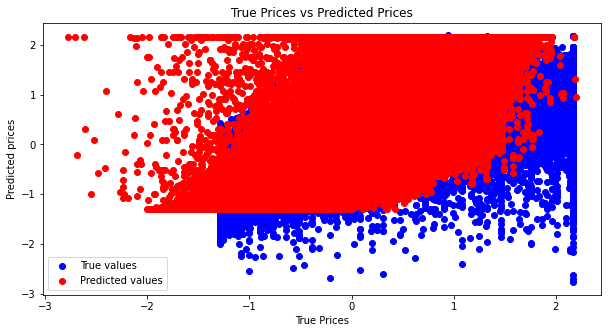

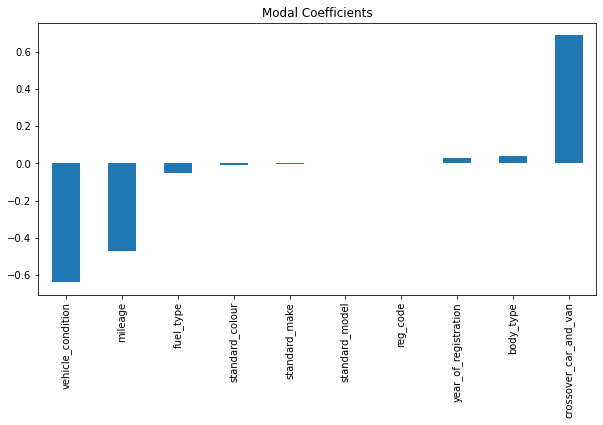

MAE:  0.5375137791367528
MSE:  0.4940699961313655
R2:  0.502391834540578


In [32]:
# Evaluate the model with cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_test, y_test, cv=5)

# Analyze true vs predicted plot
y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred, c='b', label='True values')
plt.scatter(y_pred,y_test, c='r', label='Predicted values')
plt.xlabel("True Prices")
plt.ylabel("Predicted prices")
plt.title("True Prices vs Predicted Prices")
plt.legend()
plt.show()

# Gain and discuss insights based on feature importance
coef = pd.Series(best_model.coef_, X_train.columns).sort_values()
plt.figure(figsize=(10,5))
coef.plot(kind='bar', title='Modal Coefficients')
plt.show()

# Analyze individual predictions and distribution of scores/losses
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: ", mae)
print("MSE: ", mse)
print("R2: ", r2)